In [ ]:
!pip3 install catboost

In [ ]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me


Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.




# **Logistic Regression**

**Model**

In [ ]:
df = pd.read_csv('/content/ACME-HappinessSurvey2020.csv')

In [ ]:
df.head(15)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [ ]:
df["Y"].value_counts()

1    69
0    57
Name: Y, dtype: int64

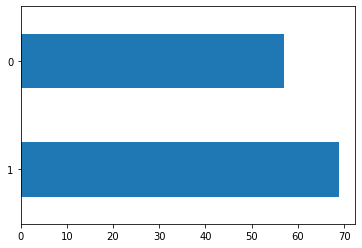

In [ ]:
df["Y"].value_counts().plot.barh();

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
X1,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
X2,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
X3,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
X4,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
X5,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
X6,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


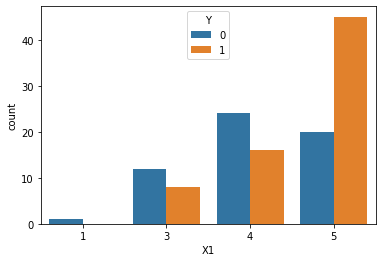

In [ ]:
sns.countplot(x='X1',hue='Y',data=df)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb4b7f084d0>,)

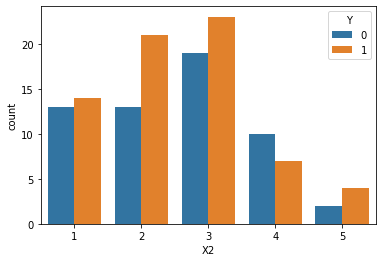

In [ ]:
sns.countplot(x='X2',hue='Y',data=df),

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb4b80c34d0>,)

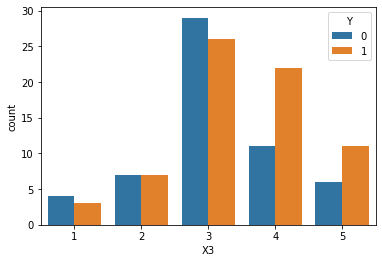

In [ ]:
sns.countplot(x='X3',hue='Y',data=df),

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb4b7da4150>,)

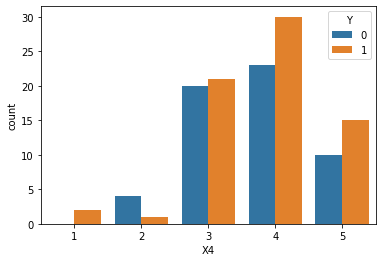

In [ ]:
sns.countplot(x='X4',hue='Y',data=df),

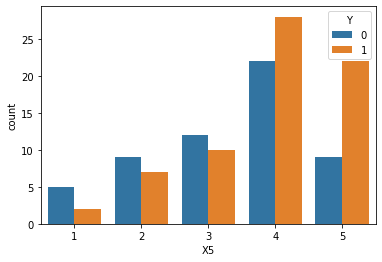

In [ ]:
sns.countplot(x='X5',hue='Y',data=df)

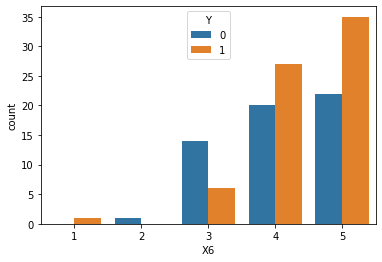

In [ ]:
sns.countplot(x='X6',hue='Y',data=df)

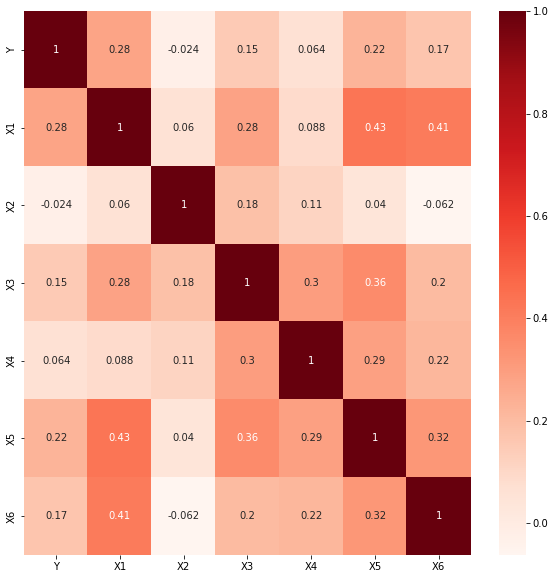

In [ ]:
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = abs(cor['Y']).sort_values(ascending=False)[1:]

cor_target

X1    0.280160
X5    0.224522
X6    0.167669
X3    0.150838
X4    0.064415
X2    0.024274
Name: Y, dtype: float64

In [ ]:
y = df["Y"]
X = df.drop(["Y"], axis=1)

**statsmodels**

In [ ]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
print(loj_model.summary())

Optimization terminated successfully.
         Current function value: 0.662533
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  126
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            5
Date:                Sun, 17 Oct 2021   Pseudo R-squ.:                 0.03786
Time:                        15:15:40   Log-Likelihood:                -83.479
converged:                       True   LL-Null:                       -86.764
Covariance Type:            nonrobust   LLR p-value:                    0.2546
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.2543      0.251      1.013      0.311      -0.238       0.746
X2            -0.1896      0.

**scikit-learn**

In [ ]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = 'liblinear' )
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
loj_model.intercept_

array([-1.16531383])

In [ ]:
loj_model.coef_

array([[ 0.33323844, -0.15174042,  0.09988177, -0.14293119,  0.21546681,
        -0.05641371]])

**FORECAST & MODEL TUNING**

In [ ]:
y_pred = loj_model.predict(X)

In [ ]:
confusion_matrix(y, y_pred)

array([[22, 35],
       [14, 55]])

In [ ]:
accuracy_score(y, y_pred)

0.6111111111111112

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.39      0.47        57
           1       0.61      0.80      0.69        69

    accuracy                           0.61       126
   macro avg       0.61      0.59      0.58       126
weighted avg       0.61      0.61      0.59       126



In [ ]:
loj_model.predict(X)[0:10]

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.66543737, 0.33456263],
       [0.54772028, 0.45227972],
       [0.43024767, 0.56975233],
       [0.46776968, 0.53223032],
       [0.46776968, 0.53223032],
       [0.46943039, 0.53056961],
       [0.58836539, 0.41163461],
       [0.42518651, 0.57481349],
       [0.38227238, 0.61772762],
       [0.38470892, 0.61529108]])

In [ ]:
y[0:10]

0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Y, dtype: int64

In [ ]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [ ]:
y_probs[0:10]

array([0.33456263, 0.45227972, 0.56975233, 0.53223032, 0.53223032,
       0.53056961, 0.41163461, 0.57481349, 0.61772762, 0.61529108])

In [ ]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [ ]:
y_pred[0:10]

[0, 0, 1, 1, 1, 1, 0, 1, 1, 1]

In [ ]:
confusion_matrix(y, y_pred)

array([[22, 35],
       [14, 55]])

In [ ]:
accuracy_score(y, y_pred)

0.6111111111111112

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.39      0.47        57
           1       0.61      0.80      0.69        69

    accuracy                           0.61       126
   macro avg       0.61      0.59      0.58       126
weighted avg       0.61      0.61      0.59       126



In [ ]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.33456263, 0.45227972, 0.56975233, 0.53223032, 0.53223032])

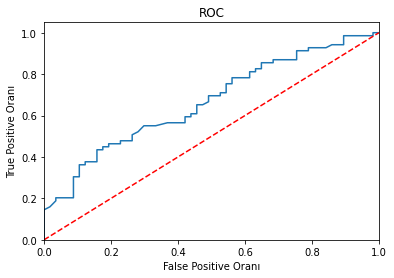

In [ ]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [ ]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy_score(y_test, loj_model.predict(X_test))

0.5263157894736842

In [ ]:
cross_val_score(loj_model, X_test, y_test, cv = 2).mean()

0.6842105263157895

# **Gaussian Naive Bayes**

In [ ]:
y = df["Y"]
X = df.drop(["Y"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb_model.predict(X_test)[0:10]

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
nb_model.predict_proba(X_test)[0:10]

array([[0.30395821, 0.69604179],
       [0.44754794, 0.55245206],
       [0.97645556, 0.02354444],
       [0.40728203, 0.59271797],
       [0.97457459, 0.02542541],
       [0.15500982, 0.84499018],
       [0.32297306, 0.67702694],
       [0.16627143, 0.83372857],
       [0.10349161, 0.89650839],
       [0.83388664, 0.16611336]])

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.47368421052631576

In [ ]:
cross_val_score(nb_model, X_test, y_test, cv = 3).mean()

0.6794871794871794

# **KNN**

**MODEL & FORECAST**

In [ ]:
y = df["Y"]
X = df.drop(["Y"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.47368421052631576

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33        20
           1       0.46      0.72      0.57        18

    accuracy                           0.47        38
   macro avg       0.48      0.49      0.45        38
weighted avg       0.48      0.47      0.44        38



**Model Tuning**

In [ ]:
knn_params = {"leaf_size": np.arange(1,50), 'n_neighbors' : np.arange(1,30) , 'p': [1,2]}

In [ ]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, ver

In [ ]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.648611111111111
En iyi parametreler: {'leaf_size': 40, 'n_neighbors': 24, 'p': 1}


In [ ]:
knn = KNeighborsClassifier(leaf_size = 40 , n_neighbors=24, p =1)
knn_tuned = knn.fit(X_train, y_train)

In [ ]:
knn_tuned.score(X_test, y_test)

0.5263157894736842

In [ ]:
y_pred = knn_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.5263157894736842

# **SVC**

**Model & FORECAST**

In [ ]:
y = df["Y"]
X = df.drop(["Y"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [ ]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.5526315789473685

**Model Tuning**

In [ ]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel =  'linear')

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 3 , 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 2}


In [ ]:
svc_tuned = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.5526315789473685

# **RBF SVC**

## **Model & FORECAST**

In [ ]:
y = df["Y"]
X = df.drop(["Y"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [ ]:
svc_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5

**Model Tuning**

In [ ]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [ ]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 8, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 8 folds for each of 64 candidates, totalling 512 fits


[Parallel(n_jobs=-1)]: Done 512 out of 512 | elapsed:    2.0s finished


GridSearchCV(cv=8, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 50, 'gamma': 0.001}


In [ ]:
svc_tuned = SVC(C = 50, gamma = 0.001).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.5263157894736842

# **NEURAL NETWORKS**

**Model & FORECAST**

In [ ]:
y = df["Y"]
X = df.drop(["Y"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler  

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled[0:5]

array([[ 0.84148188, -0.54184542, -0.4044959 , -0.7881639 , -1.54876438,
         0.97713533],
       [-0.55569558, -0.54184542,  0.61252237,  0.33052034,  0.24454174,
        -0.25126337],
       [-1.95287305,  1.22416928,  0.61252237,  1.44920458, -2.44541744,
        -1.47966207],
       [-0.55569558, -1.42485276, -2.43853245, -0.7881639 ,  0.24454174,
        -0.25126337],
       [-1.95287305, -1.42485276, -0.4044959 , -1.90684814, -2.44541744,
        -2.70806077]])

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlpc = MLPClassifier( ).fit(X_train_scaled, y_train)

In [ ]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.6052631578947368

 **Model Tuning**

In [ ]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.05, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(50,50,50),
                                     (50,100,50), 
                                     (100,), 
                                     (10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic",'tanh', 'relu']}

In [ ]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 672 candidates, totalling 6720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 2140 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 3046 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 3861 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 4630 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 5481 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 6412 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 6720 out of 6720 | elapsed: 19.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.1, 0.01, 0.02, 0.05, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
     

In [ ]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (50, 100, 50), 'solver': 'sgd'}


In [ ]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha =  0.00001, 
                           hidden_layer_sizes = (50, 100, 50),
                          solver = 'sgd')

In [ ]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.5263157894736842

# **CART**

**Model & FORECAST**

In [ ]:
y = df["Y"]
X = df.drop(["Y"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [ ]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
!pip install skompiler

     |████████████████████████████████| 45 kB 1.5 MB/s 
  Created wheel for skompiler: filename=SKompiler-0.6-py3-none-any.whl size=54287 sha256=d29b780cd1272d990c2f3c4086dc76d4ece25a22c1620410b98b17b6d4d47442
  Stored in directory: /root/.cache/pip/wheels/47/1c/59/b80a730f4afd2144bad854df4b167b812486c9d4c1bd4cf4c5
Successfully built skompiler


In [ ]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

(((0 if x[0] <= 3.5 else (0 if x[4] <= 2.0 else 1) if x[4] <= 3.5 else 0) if
    x[5] <= 3.5 else ((1 if x[4] <= 2.5 else 1 if x[2] <= 2.0 else 0 if x[4
    ] <= 3.5 else 0 if x[0] <= 3.5 else 0) if x[3] <= 3.5 else (0 if x[0] <=
    3.5 else (0 if x[1] <= 3.5 else 1) if x[4] <= 2.5 else 1) if x[2] <= 
    3.5 else 1 if x[0] <= 3.5 else 0 if x[4] <= 2.5 else 0 if x[1] <= 1.5 else
    (0 if x[1] <= 2.5 else 1) if x[1] <= 3.5 else 0) if x[4] <= 4.5 else 0) if
    x[0] <= 4.5 else (1 if x[1] <= 2.5 else 1 if x[2] <= 2.5 else (0 if x[5
    ] <= 3.5 else 0) if x[2] <= 3.5 else 1) if x[5] <= 4.5 else (0 if x[4] <=
    4.5 else 1 if x[3] <= 4.5 else 0) if x[2] <= 2.5 else 0 if x[3] <= 2.5 else
    (1 if x[4] <= 2.5 else (0 if x[1] <= 2.5 else 1 if x[1] <= 3.5 else 0) if
    x[4] <= 3.5 else (((0 if x[1] <= 2.5 else 1) if x[2] <= 3.5 else 1) if 
    x[3] <= 3.5 else 1 if x[2] <= 3.5 else 0 if x[1] <= 1.5 else (1 if x[3] <=
    4.5 else 1) if x[1] <= 2.5 else 0 if x[2] <= 4.5 else 1 if x[4] <= 

In [ ]:
x = [9]

In [ ]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [ ]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.47368421052631576

**Model Tuning**

In [ ]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [ ]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 4106 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   14.4s finished


In [ ]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 3, 'min_samples_split': 4}


In [ ]:
#final

In [ ]:
cart = tree.DecisionTreeClassifier(max_depth = 3, min_samples_split = 4)
cart_tuned = cart.fit(X_train, y_train)

In [ ]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.5789473684210527

# **Random Forests**

**Model & FORECAST**

In [ ]:
y = df["Y"]
X = df.drop(["Y"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5789473684210527

**Model Tuning**

In [ ]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,100,500,1000],
            "min_samples_split": [2,5,10]} 

In [ ]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [ ]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 423 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 712 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1105 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 10.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 2, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 1000}


**TUNING**

In [ ]:
rf_tuned = RandomForestClassifier(max_depth =5, 
                                  max_features = 2, 
                                  min_samples_split = 2,
                                  n_estimators = 10)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.631578947368421

In [ ]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

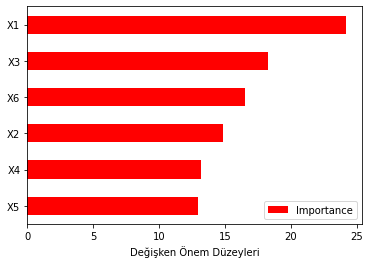

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# **Gradient Boosting Machines**

**Model & FORECAST**

In [ ]:
y = df["Y"]
X = df.drop(["Y"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7368421052631579

# **Model Tuning**

In [ ]:
gbm_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [ ]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
gbm_cv.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [ ]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
gbm = GradientBoostingClassifier(learning_rate= 0.15, )

In [ ]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7894736842105263

# **XGBoost**

 **Model & FORECAST**

In [ ]:
y = df["Y"]
X = df.drop(["Y"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42)

In [ ]:
!pip install xgboost

In [ ]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [ ]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6842105263157895

**Model Tuning**

In [ ]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [ ]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1809 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2643 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3845 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 5267 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  8.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
 

In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 500,
 'subsample': 1.0}

In [ ]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth =5,
                    min_samples_split = 2,
                    n_estimators = 500,
                    subsample = 1)

In [ ]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7368421052631579

# **LightGBM**

**Model & FORECAST**

In [ ]:
y = df["Y"]
X = df.drop(["Y"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42)

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [ ]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7894736842105263

**Model Tuning**

In [ ]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [ ]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 8, 
                             n_jobs = -1, 
                             verbose = 2)



In [ ]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 8 folds for each of 576 candidates, totalling 4608 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 526 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 932 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1806 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2808 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4138 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4608 out of 4608 | elapsed:  6.3min finished


GridSearchCV(cv=8, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max

In [ ]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 100,
 'subsample': 0.6}

In [ ]:
lgbm = LGBMClassifier(learning_rate = 0.1, 
                       max_depth = 3,
                       subsample = 1,
                       n_estimators = 500,
                       min_child_samples = 20)

In [ ]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7894736842105263

# **CatBoost**

**Model & FORECAST**

In [ ]:
y = df["Y"]
X = df.drop(["Y"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42)

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

In [ ]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6842105263157895

**Model Tuning**

In [ ]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [ ]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=8, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

In [ ]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.01}

In [ ]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.01, 
                          depth = 3)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6916457	total: 307us	remaining: 61.2ms
1:	learn: 0.6895976	total: 1.66ms	remaining: 164ms
2:	learn: 0.6877192	total: 2.36ms	remaining: 155ms
3:	learn: 0.6869683	total: 2.82ms	remaining: 138ms
4:	learn: 0.6859101	total: 3.96ms	remaining: 155ms
5:	learn: 0.6838051	total: 4.54ms	remaining: 147ms
6:	learn: 0.6825950	total: 5.02ms	remaining: 138ms
7:	learn: 0.6815558	total: 5.87ms	remaining: 141ms
8:	learn: 0.6805536	total: 6.73ms	remaining: 143ms
9:	learn: 0.6798255	total: 7.34ms	remaining: 139ms
10:	learn: 0.6778367	total: 8.35ms	remaining: 143ms
11:	learn: 0.6770715	total: 8.9ms	remaining: 139ms
12:	learn: 0.6755398	total: 9.45ms	remaining: 136ms
13:	learn: 0.6741508	total: 9.88ms	remaining: 131ms
14:	learn: 0.6729274	total: 10.3ms	remaining: 127ms
15:	learn: 0.6718173	total: 10.7ms	remaining: 124ms
16:	learn: 0.6700589	total: 11.2ms	remaining: 120ms
17:	learn: 0.6688116	total: 11.9ms	remaining: 120ms
18:	learn: 0.6674181	total: 12.4ms	remaining: 118ms
19:	learn: 0.6661590	to

In [ ]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.5263157894736842

# **BAGGING**

**Grid Search**

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
y = df["Y"]
X = df.drop(["Y"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42)

In [ ]:
param_grid = {
    'max_samples': [1, 2, 3],
    'max_features':[1, 2, 3, 4],
    'n_estimators': [50, 100, 150, 200]
}


grid_search = GridSearchCV(estimator = BaggingClassifier(), param_grid = param_grid, cv = 5)

grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_features': 2, 'max_samples': 3, 'n_estimators': 100}

In [ ]:
best_grid = grid_search.best_estimator_

print("Bagging's Accuracy: ", best_grid.score(X_test, y_test))

Bagging's Accuracy:  0.47368421052631576


# **Tüm Modellerin Karşılaştırılması**

In [ ]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned,
    best_grid
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 52.6316%
----------------------------
LogisticRegression:
Accuracy: 42.1053%
----------------------------
SVC:
Accuracy: 47.3684%
----------------------------
GaussianNB:
Accuracy: 42.1053%
----------------------------
MLPClassifier:
Accuracy: 47.3684%
----------------------------
DecisionTreeClassifier:
Accuracy: 57.8947%
----------------------------
RandomForestClassifier:
Accuracy: 68.4211%
----------------------------
GradientBoostingClassifier:
Accuracy: 78.9474%
----------------------------
CatBoostClassifier:
Accuracy: 52.6316%
----------------------------
LGBMClassifier:
Accuracy: 78.9474%
----------------------------
XGBClassifier:
Accuracy: 73.6842%
----------------------------
BaggingClassifier:
Accuracy: 47.3684%


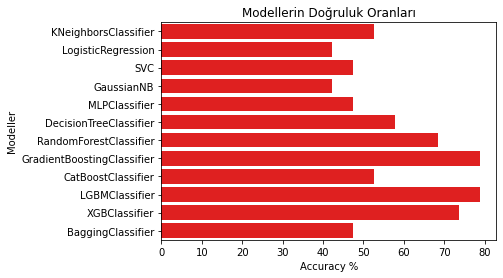

In [ ]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    